In [77]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.quantum_info import random_statevector,Statevector
from qiskit_aer import AerSimulator
from math import pi
import matplotlib.pyplot as plt

In [78]:
qr=QuantumRegister(3,name='q')
crz=ClassicalRegister(1,name='crz')
crx=ClassicalRegister(1,name='crx')
cr_result=ClassicalRegister(1,name='cr_result')

teleportation_circuit=QuantumCircuit(qr,crz,crx,cr_result)

In [79]:
#初始化
teleportation_circuit.x(0)
teleportation_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [80]:
#创建纠缠对
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)
teleportation_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [81]:
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)
teleportation_circuit.barrier()

teleportation_circuit.measure(0,crz)
teleportation_circuit.measure(1,crx)
teleportation_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [82]:
with teleportation_circuit.if_test((crx,1)):    
    teleportation_circuit.x(2)
    
with teleportation_circuit.if_test((crz,1)):    
    teleportation_circuit.z(2)

In [83]:
teleportation_circuit.measure(2,cr_result)

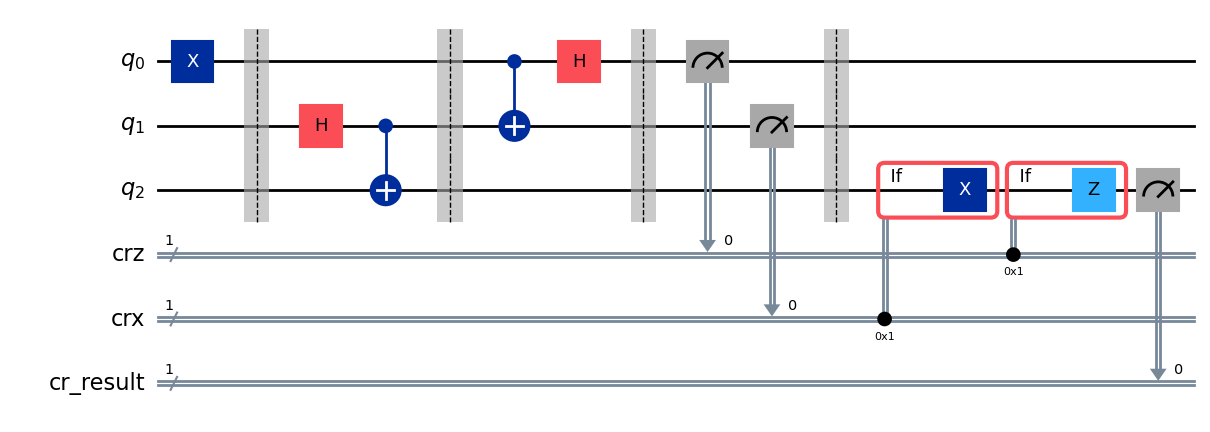

In [84]:
teleportation_circuit.draw('mpl')

In [85]:
simulator=AerSimulator()
job=simulator.run(teleportation_circuit,shots=1024)
result=job.result()
counts=result.get_counts(teleportation_circuit)
print(counts)

{'1 0 1': 268, '1 1 0': 263, '1 1 1': 263, '1 0 0': 230}
